In [1]:
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding



class CF(object):
    def __init__(self, crowd='whole', time='day', preprocess=None):
        with open('../merge/%s_%s.data'%(crowd,time),'rb') as f:
            data = pickle.load(f)
            data /= 10**4
        if preprocess == 'log':
            data = np.log(data + np.ones(data.shape))
        elif preprocess == 'sqrt':
            data = np.sqrt(data)
        self.data = data
        
    def MDS(self, link=True):
        n = self.data.shape[2]
        M = np.zeros((n,n), np.float32)
        for i in range(n):
            for j in range(i+1,n):
                M[i,j] = np.sum(np.abs(self.data[:,:,i] - self.data[:,:,j]))
                M[j,i] = M[i,j]
        mds = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1)
        coor = mds.fit_transform(M).T
        plt.figure(figsize=(12,10))
        plt.scatter(coor[0], coor[1], c=[i/n for i in range(0,n)], cmap=plt.cm.get_cmap('cool'))
        if link:
            val = 30    # 采样点间隔
            plt.plot(coor[0][::val], coor[1][::val], c='g', marker='+', linestyle='solid')
        plt.colorbar()
        plt.show()
    
    def Isomap(self, link=True):
        n = self.data.shape[2]
        isomap = Isomap(n_neighbors=4, n_components=2, n_jobs=-1)
        coor = isomap.fit_transform(self.data.reshape((-1,n)).T).T
        plt.figure(figsize=(12,10))
        plt.scatter(coor[0], coor[1], c=[1.*i/n for i in range(0,n)], cmap=plt.cm.get_cmap('cool'))
        if link:
            val = 30    # 采样点间隔
            plt.plot(coor[0][::val], coor[1][::val], c='g', marker='+', linestyle='solid')
        plt.colorbar()
        plt.show()
        
    def LCS():
        pass


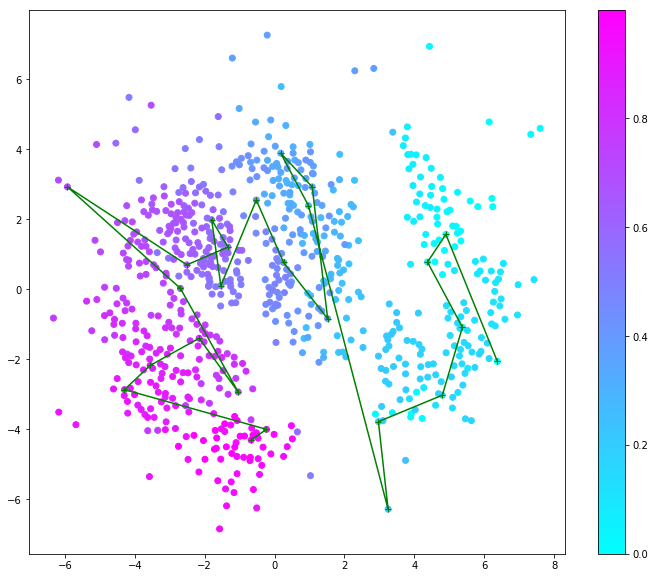

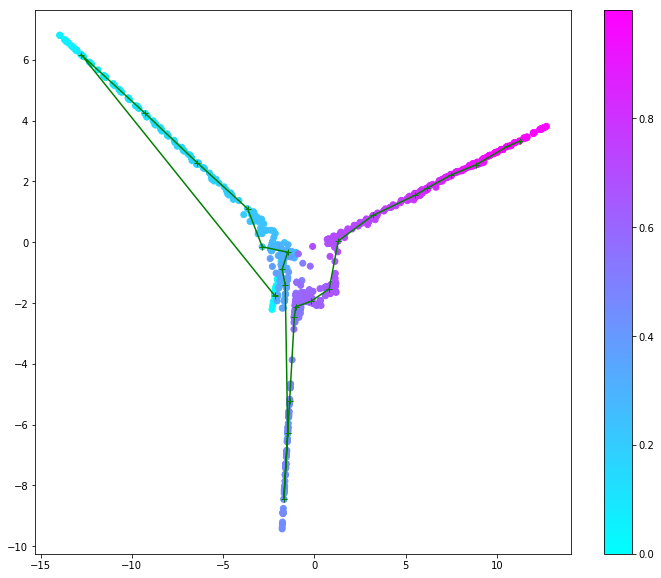

In [2]:
# 不做数据预处理
cf = CF('whole','day_mean')
cf.MDS()
cf.Isomap()

In [ ]:
# 取对数
cf = CF('whole','day','log')
cf.MDS()
cf.Isomap()

In [ ]:
# 取平方根
cf = CF('whole','day_mean','sqrt')
cf.MDS()
cf.Isomap()